In [2]:
from sklearn.cluster import KMeans
import pandas as pd
import os
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist

C:\Users\hugma\AppData\Local\Temp\ipykernel_26756\1438097675.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
filelocation_TET = 'NDT_all_12thDec_uncleaned.csv'
feelings = ['MetaAwareness','Presence','PhysicalEffort','MentalEffort','Boredom', 'Receptivity', 'EmotionalIntensity', 'Clarity', 'Release', 'Bliss', 'Embodiment', 'Insightfulness', 'Anxiety', 'SpiritualExperience']
header = "Subject"
no_dimensions = 2
colours = {0:'red',1:'green',2:'blue',3:'orange',4:'pink',5:'yellow'}
n_clust = 3
headers = {'Subject':0, 'Week':1, 'Session':2}
lcm = 332640
n_rep = 1

In [4]:
class csv_splitter:

    def __init__(self,excel_file_name):
        self.excel_file_location = f'c:\\Users\\hugma\\diss\\{excel_file_name}'
        self.dataframes = None
    def read_excel(self):
        try:
            df_excel_file_name = pd.read_csv(self.excel_file_location)
            return df_excel_file_name
        except Exception as e:
            print(f"error reading Excel file: {e}")
    def split_by_header(self,df_excel_file_name, heading):
        if heading not in df_excel_file_name.columns:
            print(f"Error: '{heading}' not found in DataFrame columns.")
            return None
        heading_values = df_excel_file_name[heading].unique()
        split_df = {value: df_excel_file_name[df_excel_file_name[heading] == value] for value in heading_values}
        split_df_array = [[key, value] for key, value in split_df.items()]
        return split_df, split_df_array

In [5]:
class principal_component_finder:

    def __init__(self,csv_file, feelings,no_dimensions):
        self.csv_file_TET = csv_file[feelings]
        corr_matrix = self.csv_file_TET.corr()
        pca = PCA(n_components=no_dimensions)
        self.principal_components=pca.fit_transform(corr_matrix)
        self.explained_variance_ratio = pca.explained_variance_ratio_
    def PCA_TOT(self):
        df_TET_feelings_prin = self.csv_file_TET.dot(self.principal_components)
        for i in range(0,self.principal_components.shape[1]):
            y_values = []
            for j in range(0,len(feelings)):
                y_values.append(self.principal_components[j][i])
            plt.figure()
            plt.bar(feelings,y_values)
            plt.title(f'principal componant {i+1}')
            plt.xticks(rotation=45, ha='right')
        plt.figure()
        plt.scatter(df_TET_feelings_prin[0],df_TET_feelings_prin[1], s=0.5)
        plt.xlabel('principal componant 1 (bored/effort)')
        plt.ylabel('principal componant 2 (calm)')
        plt.xlim(-6,6)
        plt.ylim(-1,2)
        
        return self.principal_components, self.explained_variance_ratio, df_TET_feelings_prin
    def PCA_split(self,split_df_array):
        split_df_array_TET = [[split_df_array[i][0],split_df_array[i][1][feelings]] for i in range(0,len(split_df_array))]
        split_csv_TET = {split_df_array_TET[i][0]: split_df_array_TET[i][1] for i in range(0,len(split_df_array))}
        df_TET_feelings_prin_dict = {name: split_csv_TET[name].dot(self.principal_components) for name in split_csv_TET.keys()}
        for key,value in df_TET_feelings_prin_dict.items():
            plt.figure()
            plt.scatter(value[0],value[1],s=0.5)
            plt.title(key)
            plt.xlabel('principal componant 1 (bored/effort)')
            plt.ylabel('principal componant 2 (calm)')
            plt.xlim(-6,6)
            plt.ylim(-1,2)
            plt.show()
        return df_TET_feelings_prin_dict


In [6]:
csv_splitter_instance = csv_splitter(filelocation_TET)
df_csv_file = csv_splitter_instance.read_excel()
split_df, split_csv_array = csv_splitter_instance.split_by_header(df_csv_file,header)

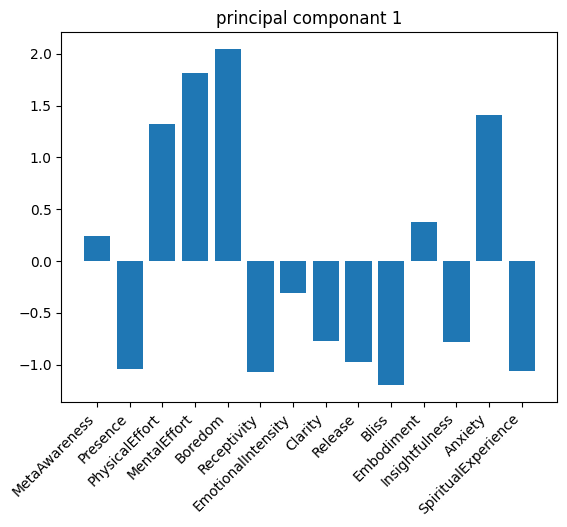

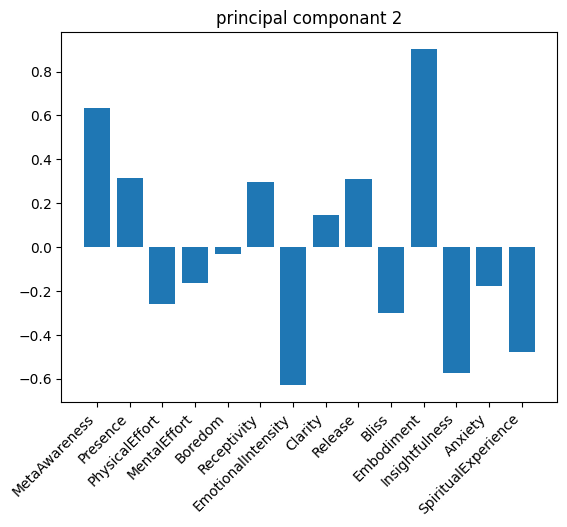

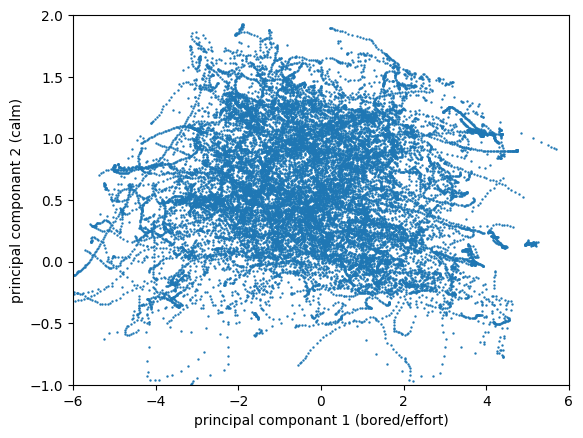

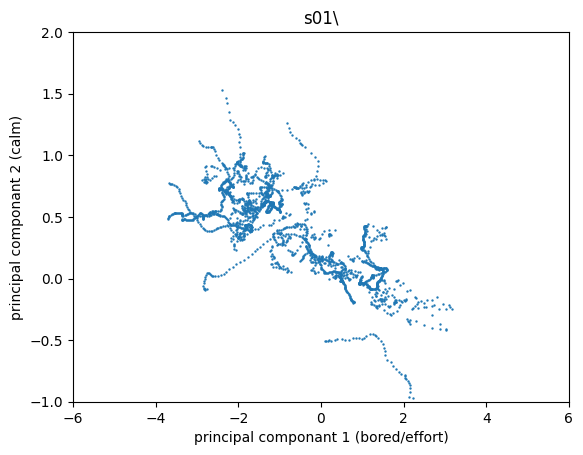

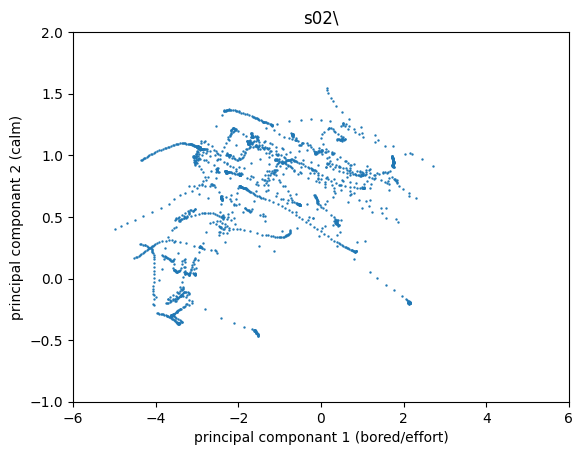

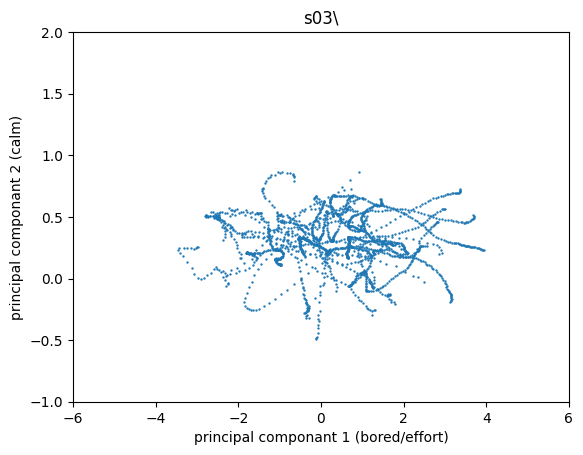

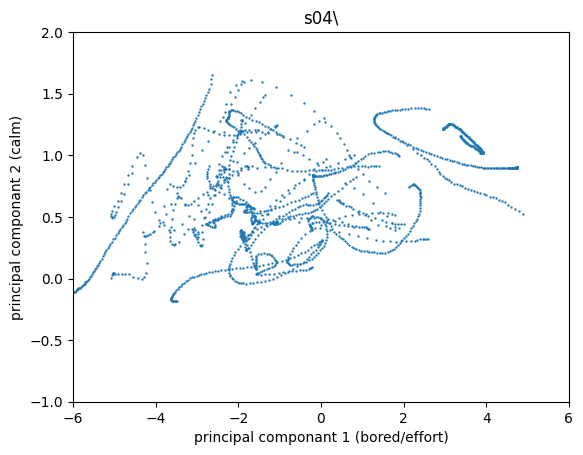

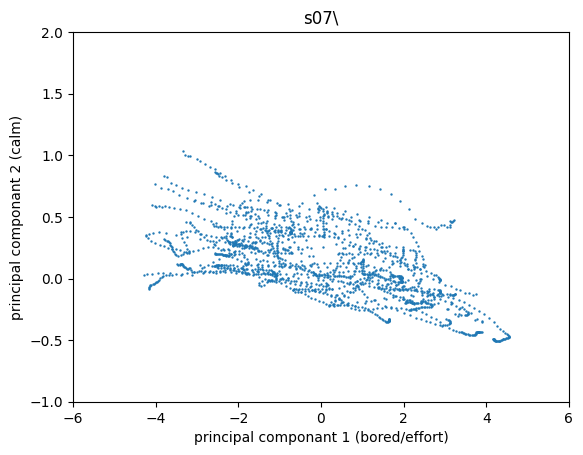

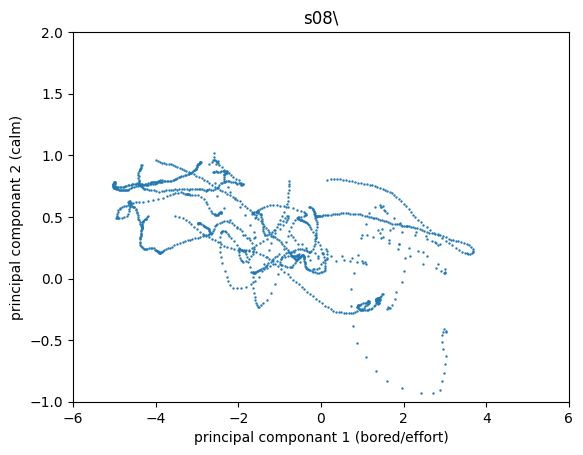

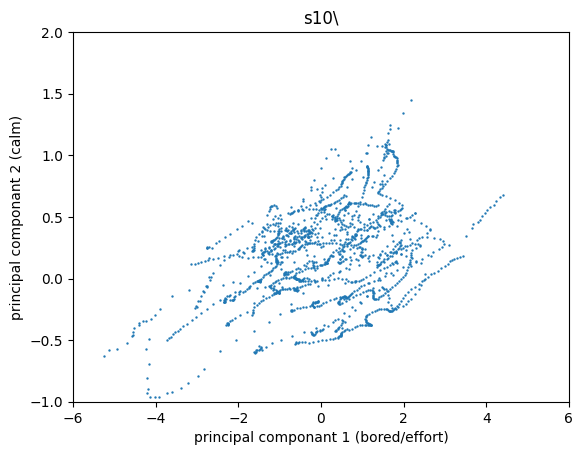

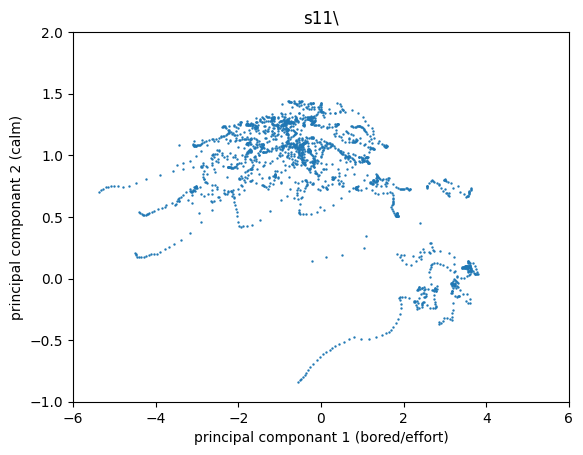

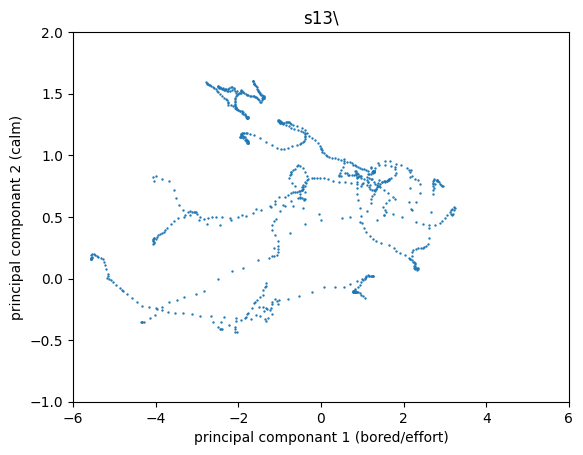

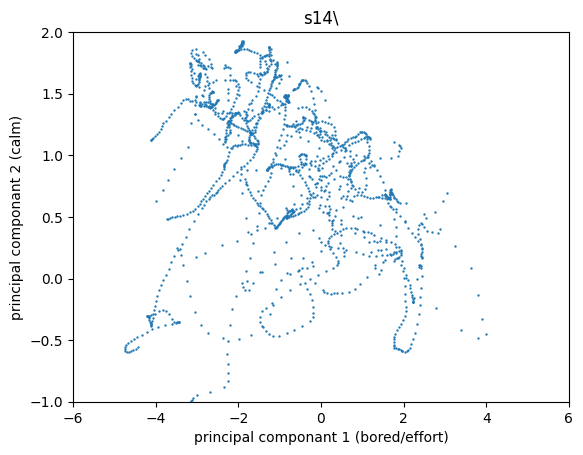

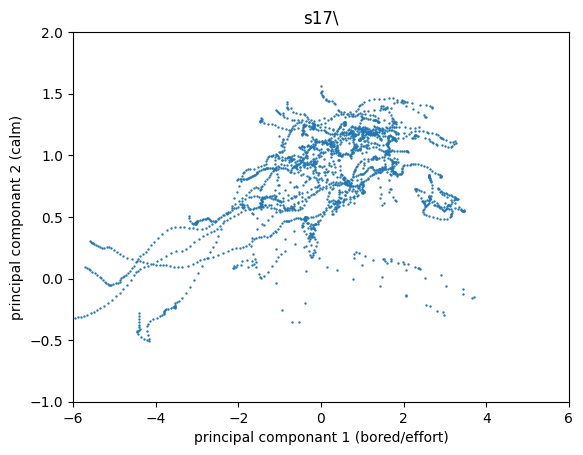

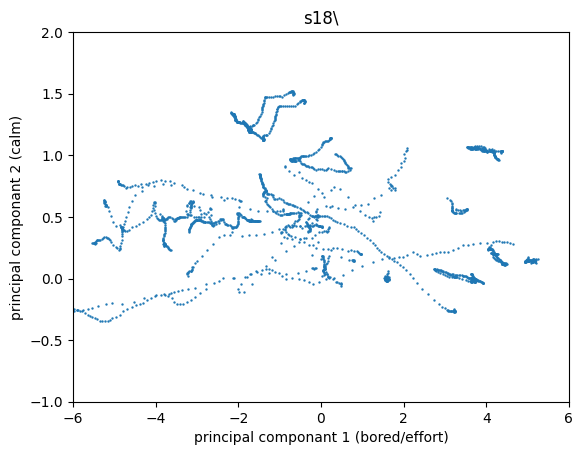

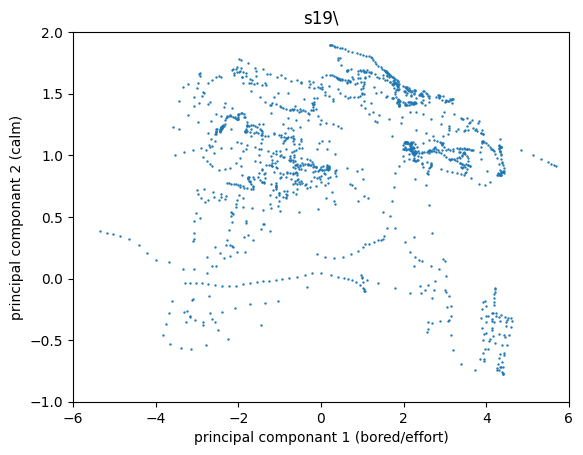

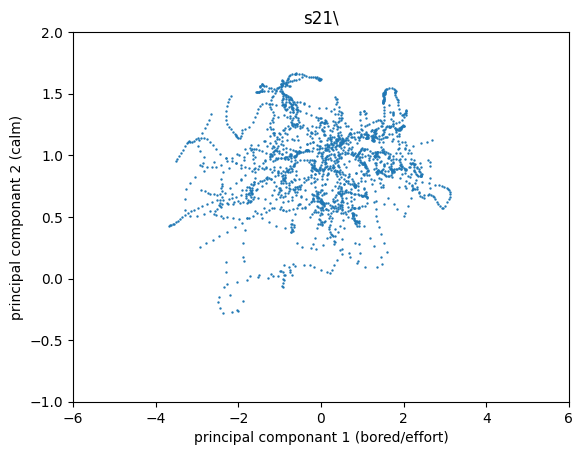

In [22]:
principal_component_finder_instance = principal_component_finder(df_csv_file,feelings,no_dimensions)
principal_components, explained_variance_ratio, df_TET_feelings_prin = principal_component_finder_instance.PCA_TOT()
df_TET_feelings_prin_dict = principal_component_finder_instance.PCA_split(split_csv_array)

In [27]:
kmeans = KMeans(4)
kmeans.fit(df_csv_file[feelings])
labels = kmeans.labels_
cluster_centres = kmeans.cluster_centers_

In [31]:
point_colours = []
for i in labels:
    point_colours.append(colours[i])

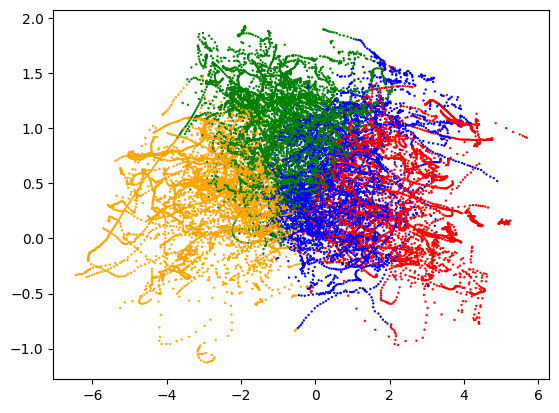

In [33]:
df_csv_file[["principal componant 1", "principal componant 2"]] = df_csv_file[feelings].dot(principal_components)
plt.scatter(df_csv_file["principal componant 1"],df_csv_file["principal componant 2"],color=point_colours, s=0.5)

array([[0.65648617, 0.57836448, 0.35022534, 0.38492209, 0.34388921,
        0.6790994 , 0.23987956, 0.49740762, 0.5366644 , 0.34235358,
        0.71602285, 0.26746776, 0.30928297, 0.2831151 ],
       [0.63203076, 0.70185797, 0.34515138, 0.32289374, 0.23521056,
        0.79674782, 0.52277967, 0.6376734 , 0.65459617, 0.66192095,
        0.58029541, 0.55744298, 0.2523909 , 0.61127574],
       [0.52479865, 0.29808845, 0.48278993, 0.59823383, 0.57701135,
        0.35913654, 0.26468523, 0.26651475, 0.31518598, 0.21196521,
        0.5053038 , 0.23822393, 0.42080176, 0.20353462]])